<a href="https://colab.research.google.com/github/sasireddyvari/LifeCycle_DataScience/blob/master/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outliers**

- Naivye Bayes Classifier--- Not Sensitive To Outliers
- SVM-------- Not Sensitive To Outliers
- Decision Tree Regressor or Classifier---- Not Sensitive
- Ensemble(RF,XGboost,GB)------- Not Sensitive
- KNN--------------------------- Not Sensitive
- Linear Regression---------- Sensitive To Outliers
- Logistic Regression------- Sensitive To Outliers
- Kmeans------------------------ Sensitive
- Hierarichal------------------- Sensitive
- PCA-------------------------- Sensitive
- Neural Networks-------------- Sensitive

All Unsupervised mostly are sensitive

In [4]:
import pandas as pd
import numpy as np

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic.csv') # survive/not
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


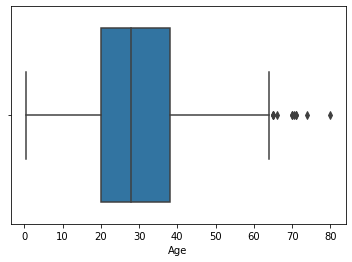

In [7]:
import seaborn as sns
sns.boxplot('Age',data=df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


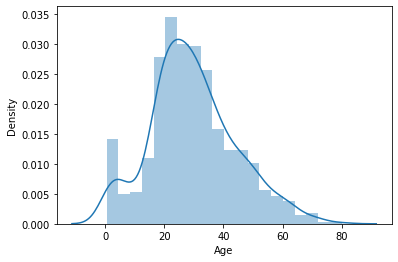

In [9]:
sns.distplot(df['Age'].dropna())

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


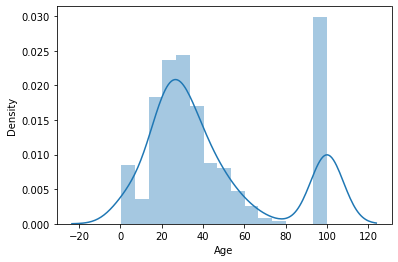

In [10]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of Passengers')

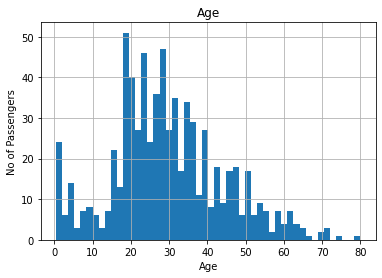

In [11]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

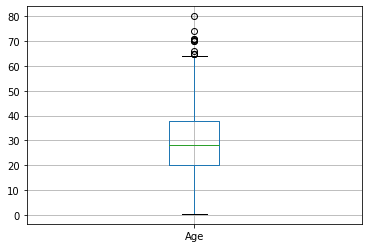

In [12]:
figure=df.boxplot(column='Age')

In [14]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
upper_bound=df['Age'].mean() + 3 * df['Age'].std()
lower_bound=df['Age'].mean() - 3 * df['Age'].std()
print(lower_bound), print(upper_bound),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

**Feature is skewed**

Text(0, 0.5, 'No of Passengers')

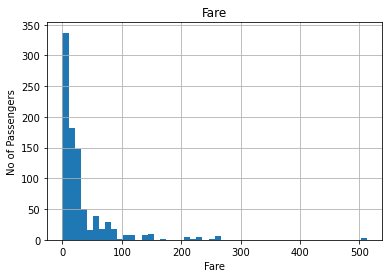

In [34]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

In [19]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

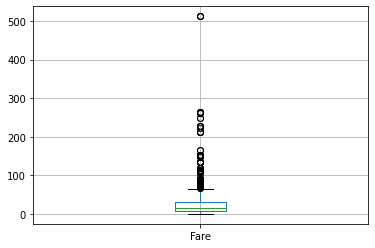

In [23]:
figure=df.boxplot(column='Fare')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


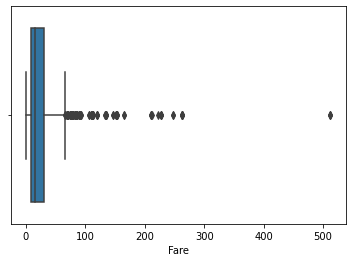

In [24]:
sns.boxplot('Fare',data=df)

In [39]:
IQR= df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
lower_bridge=df.Fare.quantile(0.25)- (1.5* IQR)
upper_bridge=df.Fare.quantile(0.75)+ (1.5* IQR)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [41]:
# Extreme Outliers
lower_bridge=df.Age.quantile(0.25)- (3* IQR)
upper_bridge=df.Age.quantile(0.75)+ (3* IQR)
print(lower_bridge), print(upper_bridge)

-49.1438
107.2688


(None, None)

In [43]:

#### Extreme outliers
lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [59]:
data=df.copy()

In [60]:
data.loc[data['Age']>73,'Age']=73

In [61]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [62]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of Passengers')

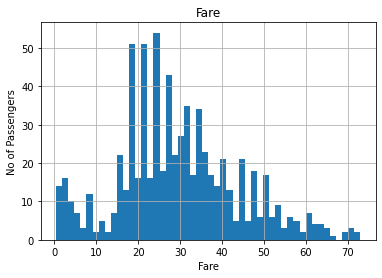

In [64]:
figure=data.Age.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

Text(0, 0.5, 'No of Passengers')

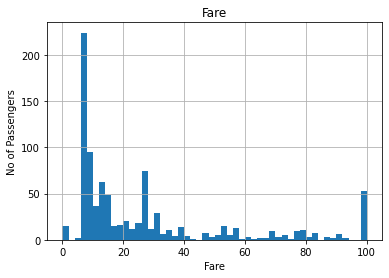

In [63]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of Passengers')

In [68]:
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
def plot_data(df,feature):
  plt.figure(figsize=(10,6))
  plt.subplot(1,2,1)
  data[feature].hist()
  plt.subplot(1,2,2)
  stat.probplot(df[feature],dist='norm',plot=pylab)
  plt.show()


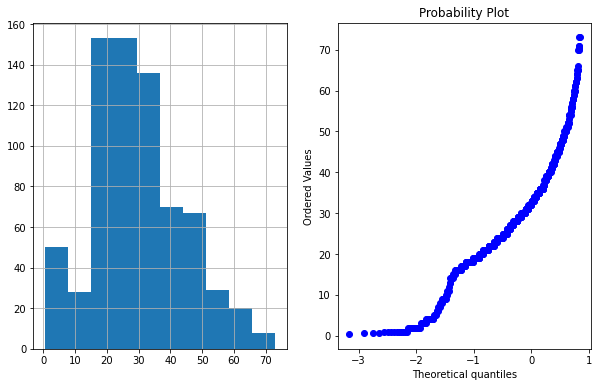

In [69]:
plot_data(data,'Age')

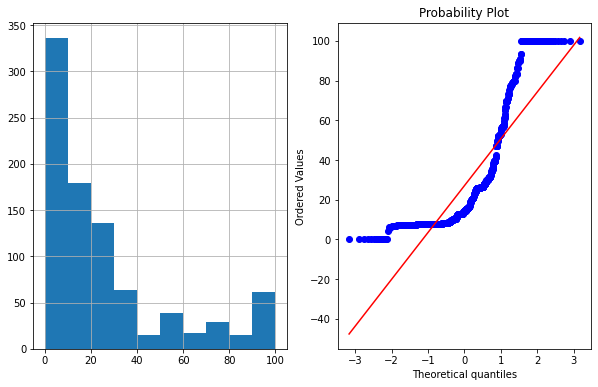

In [70]:
plot_data(data,'Fare')